In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Quiero ver como es la relación entre los valores de los thresholds para los diferentes fotoequivalentes

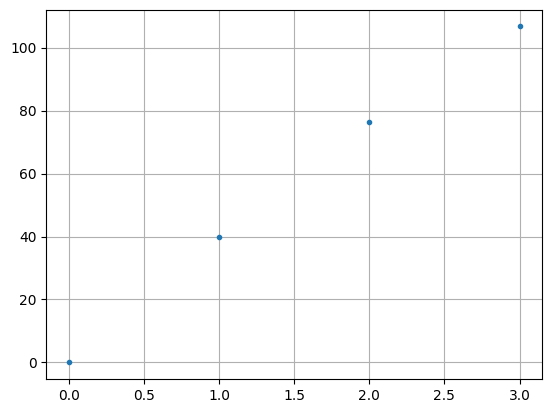

In [3]:
n_pe = (0, 1,2,3) # Lista con los valores de los fotoequivalentes
volt = (0, 39.9, 76.3, 106.7) # Lista con los voltajes de threshold para cada fotoequivalente
plt.grid()
plt.plot(n_pe, volt, '.')

Veo si puedo recuperar la curva de dark rate usando tangentes hiperbólicas, colocando los valores correspondientes de los thresholds para cada fotoequivalente y sumando las curvas de los 3 fotoequivalentes. Uso las frecuencias relativas que aparecen en la tesis de Botti para cada fotequivalente.

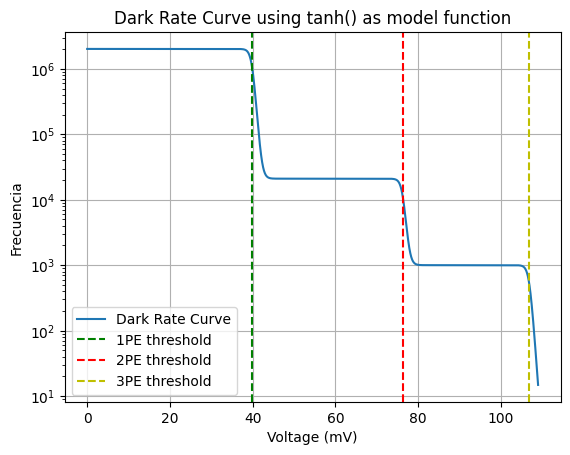

In [4]:
thr_1pe = 39.9
thr_2pe = 76.3
thr_3pe = 106.9

# Generate x values
x = np.linspace(0, 109, 10000)

# Compute tanh for each x value
y_1 = (10**6)*(-np.tanh(x-thr_1pe)+1) # Uso los valores de frecuencia relativa obtenidos de la tesis de Botti
y_2 = (10**4)*(-np.tanh(x-thr_2pe)+1)
y_3 = (5*10**2)*(-np.tanh(x-thr_3pe)+1)

y = y_1 + y_2 + y_3

# Create the plot
plt.plot(x, y, label='Dark Rate Curve')

# Add title and labels
plt.title('Dark Rate Curve using tanh() as model function')
plt.yscale('log')
plt.xlabel('Voltage (mV)')
plt.ylabel('Frecuencia')

plt.axvline(thr_1pe, color = 'g', label = '1PE threshold', linestyle = '--')
plt.axvline(thr_2pe, color = 'r', label = '2PE threshold', linestyle = '--')
plt.axvline(thr_3pe, color = 'y', label = '3PE threshold', linestyle = '--')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.savefig('dark_rate.pdf', dpi=1000)


In [5]:
# Entonces el valor del threshold que se usa en las mediciones que es de 2.5PE vale:

real_threshold = (thr_2pe + thr_3pe)/2
real_threshold

91.6